In [1]:
!pip install fastai --upgrade
!pip install timm wwf

     |████████████████████████████████| 194kB 7.0MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 245kB 7.7MB/s 


In [2]:
!wget https://www.dropbox.com/s/qrdswgzv63o3opg/datasetCorregido.zip?dl=1 -O erm.zip

--2021-03-05 09:00:02--  https://www.dropbox.com/s/qrdswgzv63o3opg/datasetCorregido.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/qrdswgzv63o3opg/datasetCorregido.zip [following]
--2021-03-05 09:00:02--  https://www.dropbox.com/s/dl/qrdswgzv63o3opg/datasetCorregido.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4378c98923fac01eb9a4509996.dl.dropboxusercontent.com/cd/0/get/BKFa1V-uf-lw28G2wh0X1QnUWGi6vPO6uITew1IRYiS5eFN4TG4bdd_TnhTjtImOccmV103qfqhUeVEEu9WafAxQeGakQJl9_0GmlkEgP0snZIWklpxJZyeiqeOnzIXBOTVsXGYPZHznx6JZ4quzeeV-/file?dl=1# [following]
--2021-03-05 09:00:03--  https://uc4378c98923fac01eb9a4509996.dl.dropboxusercontent.com/cd/0/get/BKFa1V-uf-lw28G2wh0X1QnUWGi6vPO6uITew1IRYiS5eFN4TG4bdd_TnhTjtImO

In [3]:
!unzip erm.zip

Archive:  erm.zip
   creating: datasetCorregido/
   creating: datasetCorregido/train/
   creating: datasetCorregido/train/no/
  inflating: datasetCorregido/train/no/anonymized_482127.jpg  
  inflating: datasetCorregido/train/no/anonymized_174749.jpg  
  inflating: datasetCorregido/train/no/anonymized_734047.jpg  
  inflating: datasetCorregido/train/no/anonymized_581767.jpg  
  inflating: datasetCorregido/train/no/anonymized_1400777.jpg  
  inflating: datasetCorregido/train/no/anonymized_347431.jpg  
  inflating: datasetCorregido/train/no/anonymized_626433.jpg  
  inflating: datasetCorregido/train/no/anonymized_1372303.jpg  
  inflating: datasetCorregido/train/no/anonymized_1324599.jpg  
  inflating: datasetCorregido/train/no/anonymized_196853.jpg  
  inflating: datasetCorregido/train/no/anonymized_687000.jpg  
  inflating: datasetCorregido/train/no/anonymized_504041.jpg  
  inflating: datasetCorregido/train/no/anonymized_1414333.jpg  
  inflating: datasetCorregido/train/no/anonymized_3

In [4]:
from fastai.vision.all import *
import fastai
from wwf.vision.timm import *

In [5]:
path = Path('datasetCorregido/')
trainPath = path/'train'
testPath = path/'test'

In [6]:
def getDataBlock(presize=512,size=256):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(presize),
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=360,max_warp=0,max_zoom=1.1,
                      max_lighting=0.1,p_lighting=0.5), Normalize.from_stats(*imagenet_stats)])

In [7]:
db512 = getDataBlock()
dls512 = db512.dataloaders(trainPath,bs=32)

In [8]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest18')
]

In [9]:
modelo='efficientnet_b3'

## Ranger

In [10]:
opt_func = partial(ranger, beta=(0.9,0.99), eps=1e-6)

In [ ]:
learn = timm_learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b3_ra2-cf984f9c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_ra2-cf984f9c.pth


SuggestedLRs(lr_min=0.06309573650360108, lr_steep=7.585775847473997e-07)

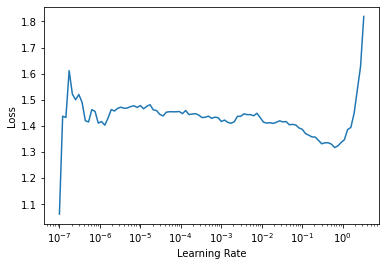

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.313257,0.945066,0.500000,0.486068,0.493711,01:20
1,1.264345,0.911800,0.524465,0.512545,0.449686,01:19


Better model found at epoch 0 with valid_loss value: 0.9450662136077881.


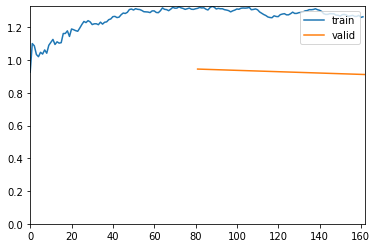

Better model found at epoch 1 with valid_loss value: 0.91180020570755.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.199613,0.897770,0.541284,0.529801,0.503145,01:43
1,1.236706,0.895251,0.542813,0.529412,0.537736,01:41
2,1.181957,0.881464,0.513761,0.500000,0.490566,01:41
3,1.187790,0.870134,0.522936,0.508671,0.553459,01:41
4,1.179410,0.846274,0.533639,0.520124,0.528302,01:41
5,1.174700,0.828322,0.547401,0.534810,0.531447,01:41
6,1.078764,0.825785,0.541284,0.528302,0.528302,01:41
7,1.056547,0.820384,0.556575,0.542945,0.556604,01:41
8,1.052862,0.813639,0.551988,0.540984,0.518868,01:41
9,1.050099,0.800906,0.539755,0.524638,0.569182,01:41


Better model found at epoch 0 with valid_loss value: 0.8977700471878052.


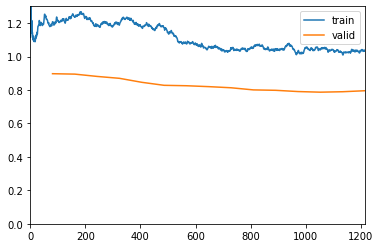

Better model found at epoch 1 with valid_loss value: 0.8952507972717285.
Better model found at epoch 2 with valid_loss value: 0.8814641237258911.
Better model found at epoch 3 with valid_loss value: 0.8701340556144714.
Better model found at epoch 4 with valid_loss value: 0.8462736010551453.
Better model found at epoch 5 with valid_loss value: 0.8283224701881409.
Better model found at epoch 6 with valid_loss value: 0.8257849216461182.
Better model found at epoch 7 with valid_loss value: 0.8203844428062439.
Better model found at epoch 8 with valid_loss value: 0.8136385083198547.
Better model found at epoch 9 with valid_loss value: 0.8009057641029358.
Better model found at epoch 10 with valid_loss value: 0.7984419465065002.
Better model found at epoch 11 with valid_loss value: 0.7909859418869019.
Better model found at epoch 12 with valid_loss value: 0.7872822880744934.


In [ ]:
learn.fine_tune(15,freeze_epochs=2)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

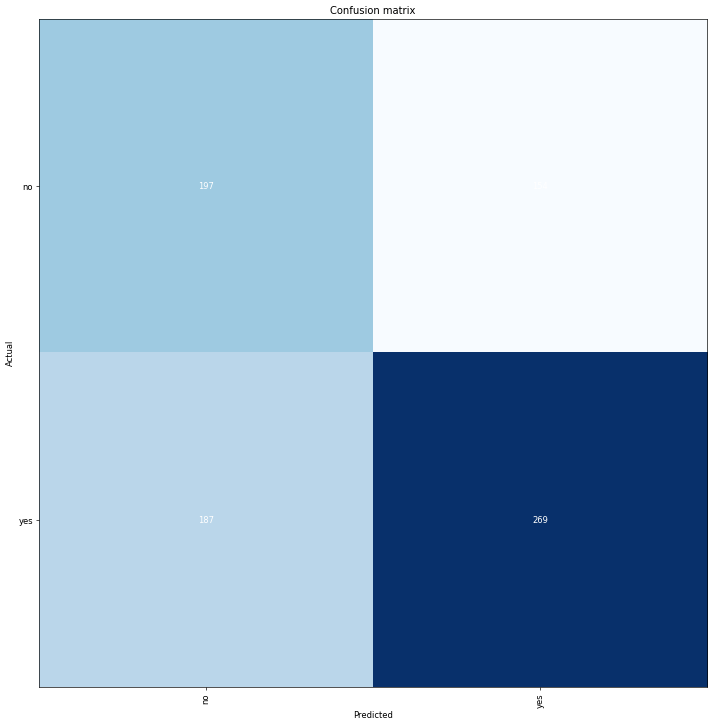

In [ ]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5774473547935486.


(#4) [0.9453737735748291,0.5774473547935486,0.6359338061465721,0.5899122807017544]

## Faltten

In [ ]:
learn = timm_learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.343434,0.961435,0.576453,0.579767,0.468553,01:18
1,0.976500,0.792523,0.579511,0.566154,0.578616,01:18


Better model found at epoch 0 with valid_loss value: 0.9614347219467163.


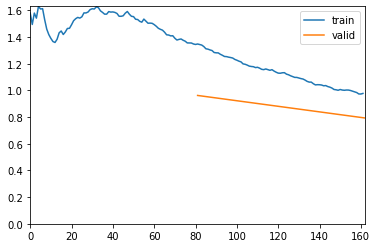

Better model found at epoch 1 with valid_loss value: 0.7925233840942383.


In [ ]:
learn.fit_flat_cos(2,lr=1e-3)

In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=1.318256749982538e-07, lr_steep=7.585775847473997e-07)

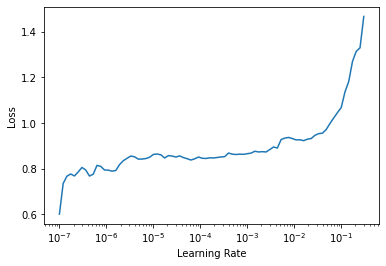

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.989261,1.080462,0.483180,0.484277,0.968553,01:41
1,1.022048,0.999920,0.492355,0.488411,0.927673,01:41
2,1.050900,1.202620,0.478593,0.481659,0.949686,01:40
3,1.000706,1.574152,0.487768,0.486443,0.959119,01:40
4,0.990670,0.763647,0.480122,0.482484,0.952830,01:41
5,1.050485,0.751283,0.500000,0.492846,0.974843,01:41
6,1.048154,58.061096,0.506116,0.495826,0.933962,01:41
7,0.920730,0.802125,0.490826,0.487725,0.937107,01:41
8,0.894432,0.940408,0.509174,0.469388,0.072327,01:41


Better model found at epoch 0 with valid_loss value: 1.0804623365402222.


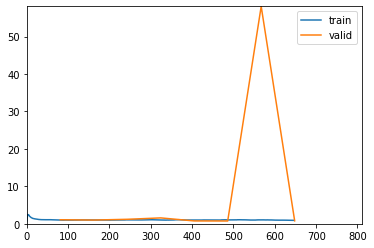

Better model found at epoch 1 with valid_loss value: 0.9999203085899353.
Better model found at epoch 4 with valid_loss value: 0.7636472582817078.
Better model found at epoch 5 with valid_loss value: 0.7512833476066589.
No improvement since epoch 5: early stopping


In [ ]:
learn.fit_flat_cos(10,lr=1e-2)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

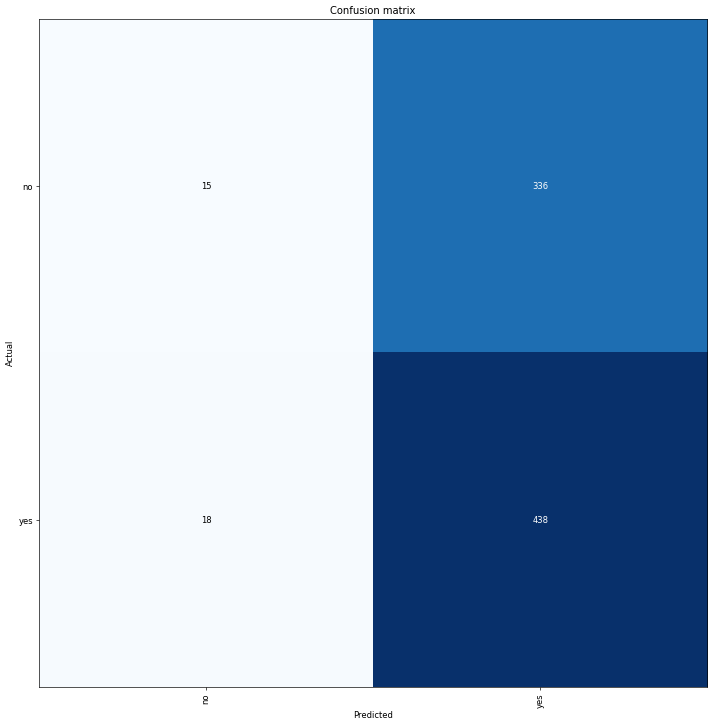

In [ ]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5613383054733276.


(#4) [0.7791721820831299,0.5613383054733276,0.5658914728682171,0.9605263157894737]

## LabelSmoothing

In [ ]:
learn = timm_learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],loss_func=LabelSmoothingCrossEntropy())

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=5.754399353463668e-06)

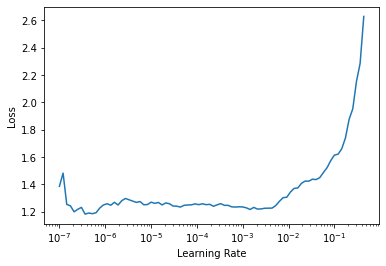

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.332184,1.116786,0.558104,0.534118,0.713836,01:18
1,1.162331,0.855969,0.553517,0.540881,0.540881,01:18


Better model found at epoch 0 with valid_loss value: 1.1167864799499512.


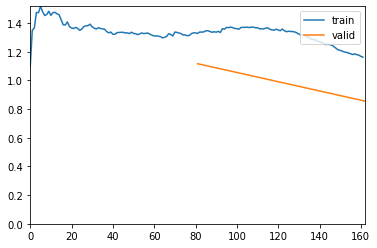

Better model found at epoch 1 with valid_loss value: 0.8559687733650208.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.830930,0.731427,0.599388,0.589744,0.578616,01:41
1,0.776696,0.704312,0.611621,0.604575,0.581761,01:41
2,0.742957,0.675190,0.614679,0.595376,0.647799,01:41
3,0.694561,0.681999,0.619266,0.598854,0.657233,01:41
4,0.680750,0.668020,0.608563,0.585635,0.666667,01:41
5,0.668796,0.681109,0.584098,0.554245,0.738994,01:41
6,0.665744,0.661880,0.640673,0.620290,0.672956,01:41
7,0.651126,0.670514,0.626911,0.614907,0.622642,01:41
8,0.635448,0.647677,0.645260,0.633540,0.641509,01:41
9,0.618393,0.654740,0.629969,0.642857,0.537736,01:41


Better model found at epoch 0 with valid_loss value: 0.731427013874054.


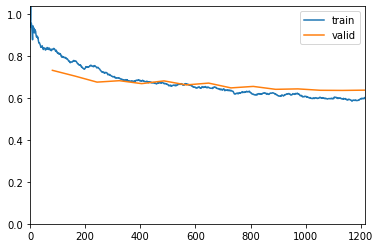

Better model found at epoch 1 with valid_loss value: 0.7043117880821228.
Better model found at epoch 2 with valid_loss value: 0.6751903891563416.
Better model found at epoch 4 with valid_loss value: 0.6680200099945068.
Better model found at epoch 6 with valid_loss value: 0.6618799567222595.
Better model found at epoch 8 with valid_loss value: 0.6476767659187317.
Better model found at epoch 10 with valid_loss value: 0.6408533453941345.
Better model found at epoch 12 with valid_loss value: 0.6362840533256531.
Better model found at epoch 13 with valid_loss value: 0.6356566548347473.


In [ ]:
learn.fine_tune(15,freeze_epochs=2)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

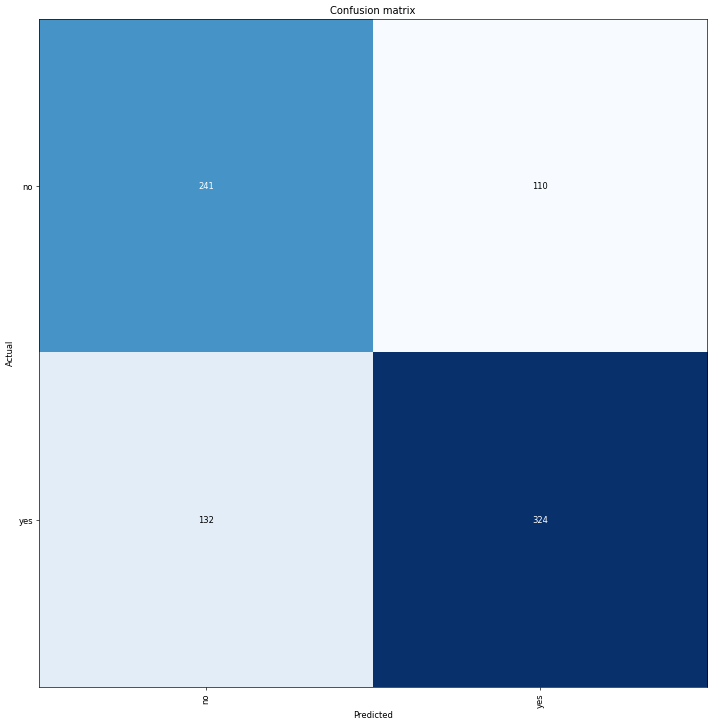

In [ ]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.7001239061355591.


(#4) [2.9712677001953125,0.7001239061355591,0.7465437788018433,0.7105263157894737]

## MixUp

In [11]:
mixup=MixUp()
callbacks2 = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest18'),
    mixup
]

In [12]:
learn = timm_learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()])

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b3_ra2-cf984f9c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_ra2-cf984f9c.pth


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.291744,1.009467,0.550459,0.569801,0.583090,00:38
1,1.144100,0.862534,0.559633,0.562642,0.720117,00:38


Better model found at epoch 0 with valid_loss value: 1.0094674825668335.


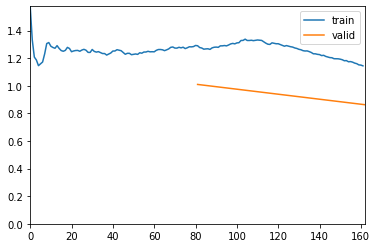

Better model found at epoch 1 with valid_loss value: 0.8625343441963196.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.815319,0.710344,0.562691,0.584071,0.577259,00:49
1,0.750473,0.696105,0.574924,0.589041,0.626822,00:49
2,0.729479,0.673754,0.591743,0.613095,0.600583,00:49
3,0.706981,0.678257,0.565749,0.579088,0.629738,00:49
4,0.682390,0.662271,0.597859,0.636986,0.542274,00:49
5,0.679791,0.651153,0.614679,0.627451,0.653061,00:49
6,0.668860,0.643375,0.626911,0.628571,0.705539,00:49
7,0.670815,0.650297,0.614679,0.657439,0.553936,00:49
8,0.669640,0.627441,0.640673,0.659763,0.650146,00:49
9,0.659455,0.632433,0.614679,0.661922,0.542274,00:49


Better model found at epoch 0 with valid_loss value: 0.7103437781333923.


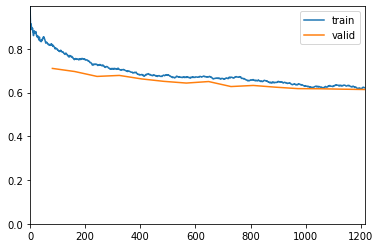

Better model found at epoch 1 with valid_loss value: 0.6961054801940918.
Better model found at epoch 2 with valid_loss value: 0.6737537980079651.
Better model found at epoch 4 with valid_loss value: 0.6622705459594727.
Better model found at epoch 5 with valid_loss value: 0.6511525511741638.
Better model found at epoch 6 with valid_loss value: 0.6433753371238708.
Better model found at epoch 8 with valid_loss value: 0.6274406313896179.
Better model found at epoch 10 with valid_loss value: 0.6245388388633728.
Better model found at epoch 11 with valid_loss value: 0.6179245710372925.
Better model found at epoch 12 with valid_loss value: 0.6173009872436523.
Better model found at epoch 13 with valid_loss value: 0.6154007315635681.
Better model found at epoch 14 with valid_loss value: 0.6138845086097717.


In [13]:
learn.fine_tune(15,freeze_epochs=2)

In [14]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

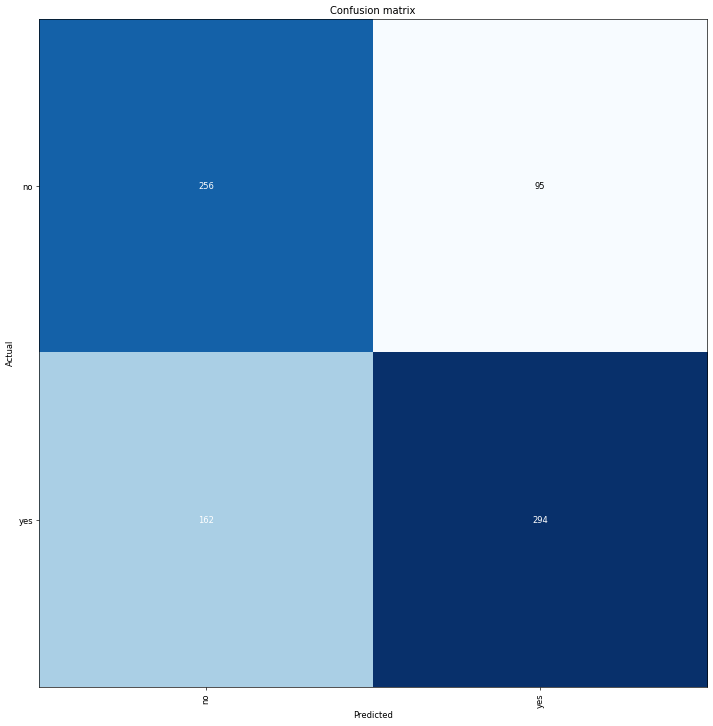

In [15]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [16]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.6815365552902222.


(#4) [0.5929992198944092,0.6815365552902222,0.7557840616966581,0.6447368421052632]

## Ranger + Flat cosin Anneal

In [17]:
learn = timm_learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.235487,0.967989,0.539755,0.555263,0.615160,00:39
1,1.243016,0.926526,0.524465,0.549080,0.521866,00:39


Better model found at epoch 0 with valid_loss value: 0.967988908290863.


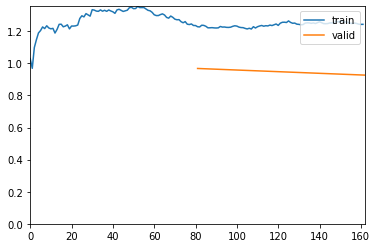

Better model found at epoch 1 with valid_loss value: 0.9265257120132446.


In [18]:
learn.fit_flat_cos(2,lr=1e-3)

In [19]:
learn.unfreeze()

SuggestedLRs(lr_min=9.120108734350651e-06, lr_steep=8.31763736641733e-06)

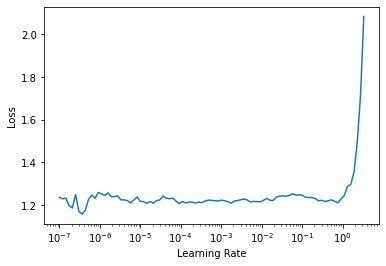

In [20]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.172764,0.852377,0.525994,0.551402,0.516035,00:50
1,1.001261,0.779203,0.558104,0.578947,0.577259,00:50
2,0.918711,0.727583,0.594801,0.621875,0.580175,00:50
3,0.799401,0.669919,0.628440,0.654321,0.618076,00:50
4,0.751622,0.643794,0.639144,0.666667,0.623907,00:50
5,0.685728,0.643251,0.651376,0.693603,0.600583,00:50
6,0.653613,0.627337,0.643731,0.682119,0.600583,00:50
7,0.625892,0.622048,0.657492,0.724528,0.559767,00:50
8,0.613605,0.607050,0.671254,0.710526,0.629738,00:49
9,0.615378,0.608996,0.674312,0.725694,0.609329,00:50


Better model found at epoch 0 with valid_loss value: 0.8523767590522766.


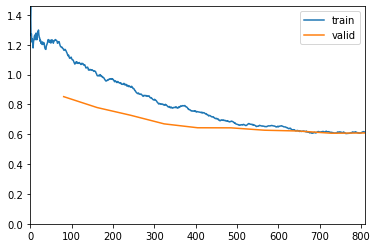

Better model found at epoch 1 with valid_loss value: 0.7792033553123474.
Better model found at epoch 2 with valid_loss value: 0.7275826334953308.
Better model found at epoch 3 with valid_loss value: 0.6699185371398926.
Better model found at epoch 4 with valid_loss value: 0.6437935829162598.
Better model found at epoch 5 with valid_loss value: 0.643251359462738.
Better model found at epoch 6 with valid_loss value: 0.6273373365402222.
Better model found at epoch 7 with valid_loss value: 0.6220483183860779.
Better model found at epoch 8 with valid_loss value: 0.6070504188537598.


In [21]:
learn.fit_flat_cos(10,lr=1e-2)

In [22]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [23]:
learn.dls = dlsTest

In [24]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.6790582537651062.


(#4) [0.5713946223258972,0.6790582537651062,0.7612732095490716,0.6293859649122807]

## Ranger+Flar Cossin Anneal+LabelSmoothing

In [25]:
learn = timm_learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func,loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.310544,0.965104,0.507645,0.540230,0.411079,00:39
1,1.269913,0.916384,0.516820,0.552941,0.411079,00:39


Better model found at epoch 0 with valid_loss value: 0.965104341506958.


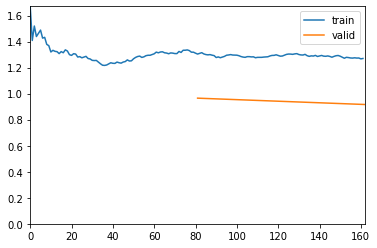

Better model found at epoch 1 with valid_loss value: 0.9163841605186462.


In [26]:
learn.fit_flat_cos(2,lr=1e-3)

In [27]:
learn.unfreeze()

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=1.9054607491852948e-06)

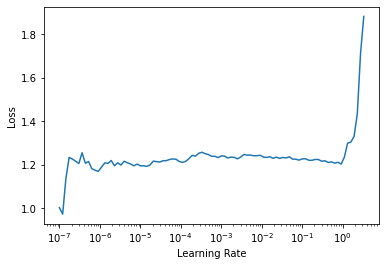

In [28]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.187634,0.802189,0.562691,0.580737,0.597668,00:49
1,1.049267,0.783524,0.570336,0.604027,0.524781,00:50
2,0.923597,0.687018,0.603976,0.617978,0.641399,00:50
3,0.826747,0.686205,0.607034,0.631902,0.600583,00:50
4,0.758829,0.668563,0.619266,0.632768,0.653061,00:50
5,0.712385,0.658353,0.622324,0.640351,0.638484,00:50
6,0.678479,0.660919,0.619266,0.635057,0.644315,00:50
7,0.663135,0.664733,0.616208,0.644654,0.597668,00:50
8,0.659249,0.653091,0.637615,0.643243,0.693878,00:50
9,0.649911,0.648005,0.639144,0.649860,0.676385,00:50


Better model found at epoch 0 with valid_loss value: 0.8021885752677917.


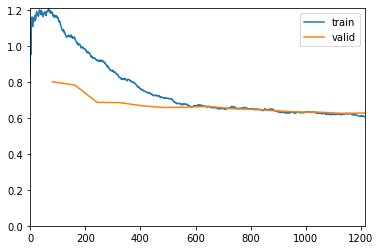

Better model found at epoch 1 with valid_loss value: 0.783523678779602.
Better model found at epoch 2 with valid_loss value: 0.6870176196098328.
Better model found at epoch 3 with valid_loss value: 0.6862050294876099.
Better model found at epoch 4 with valid_loss value: 0.6685627102851868.
Better model found at epoch 5 with valid_loss value: 0.6583525538444519.
Better model found at epoch 8 with valid_loss value: 0.6530909538269043.
Better model found at epoch 9 with valid_loss value: 0.6480053067207336.
Better model found at epoch 10 with valid_loss value: 0.6406134366989136.
Better model found at epoch 11 with valid_loss value: 0.6336286664009094.
Better model found at epoch 12 with valid_loss value: 0.6325410008430481.
Better model found at epoch 13 with valid_loss value: 0.6259390115737915.


In [29]:
learn.fit_flat_cos(15,lr=1e-2)

In [30]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [31]:
learn.dls = dlsTest

In [32]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.7199504375457764.


(#4) [0.5807446241378784,0.7199504375457764,0.7918781725888325,0.6842105263157895]

## Ranger +Flat + Label + MixUp

In [33]:
learn = timm_learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func,loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.268289,0.909104,0.529052,0.556634,0.501458,00:39
1,1.215075,0.883885,0.522936,0.554007,0.463557,00:39


Better model found at epoch 0 with valid_loss value: 0.909103512763977.


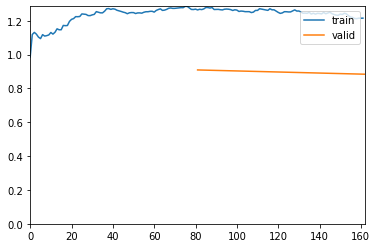

Better model found at epoch 1 with valid_loss value: 0.8838849067687988.


In [34]:
learn.fit_flat_cos(2,lr=1e-3)

In [35]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.157970,0.812108,0.558104,0.600000,0.472303,00:50
1,1.051354,0.809779,0.533639,0.584071,0.384840,00:50
2,0.924187,0.734689,0.541284,0.588477,0.416910,00:50
3,0.838299,0.699583,0.594801,0.672566,0.443149,00:50
4,0.759351,0.663467,0.613150,0.636364,0.612245,00:50
5,0.728691,0.659661,0.611621,0.669202,0.513120,00:50
6,0.706155,0.659780,0.599388,0.634551,0.556851,00:50
7,0.688003,0.657754,0.603976,0.635484,0.574344,00:50
8,0.681628,0.653501,0.620795,0.664360,0.559767,00:50
9,0.675920,0.647148,0.648318,0.668657,0.653061,00:50


Better model found at epoch 0 with valid_loss value: 0.8121079206466675.


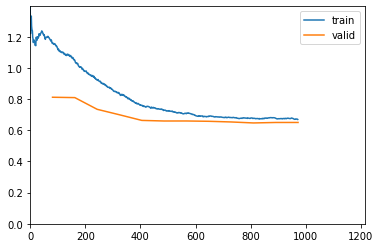

Better model found at epoch 1 with valid_loss value: 0.8097794651985168.
Better model found at epoch 2 with valid_loss value: 0.734689474105835.
Better model found at epoch 3 with valid_loss value: 0.699583113193512.
Better model found at epoch 4 with valid_loss value: 0.6634668707847595.
Better model found at epoch 5 with valid_loss value: 0.6596607565879822.
Better model found at epoch 7 with valid_loss value: 0.6577540040016174.
Better model found at epoch 8 with valid_loss value: 0.6535013914108276.
Better model found at epoch 9 with valid_loss value: 0.6471482515335083.
No improvement since epoch 9: early stopping


In [36]:
learn.fit_flat_cos(15,lr=1e-2)

In [37]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

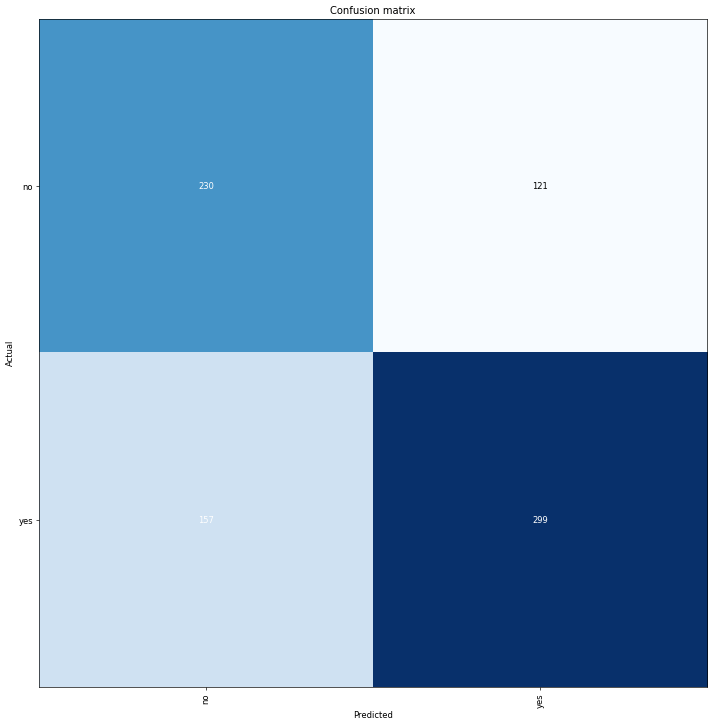

In [38]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [39]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.6555142402648926.


(#4) [0.6360772252082825,0.6555142402648926,0.7119047619047619,0.6557017543859649]

## Ranger + Flat + MixUp

In [40]:
mixup=MixUp()
callbacks2 = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest18'),
    mixup
]

In [41]:
learn = timm_learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.321743,0.925942,0.521407,0.540761,0.580175,00:40
1,1.325168,0.904623,0.524465,0.542105,0.600583,00:39


Better model found at epoch 0 with valid_loss value: 0.9259415864944458.


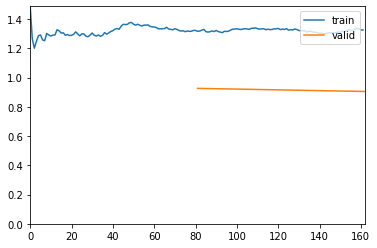

Better model found at epoch 1 with valid_loss value: 0.9046230316162109.


In [42]:
learn.fit_flat_cos(2,lr=1e-3)

In [43]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.160941,0.785415,0.558104,0.582822,0.553936,00:50
1,1.070737,0.730701,0.599388,0.596659,0.728863,00:50
2,0.932778,0.718314,0.605505,0.608142,0.696793,00:50
3,0.832629,0.669418,0.593272,0.606648,0.638484,00:50
4,0.790285,0.657345,0.591743,0.606742,0.629738,00:50
5,0.717800,0.673606,0.605505,0.591398,0.801749,00:50
6,0.690320,0.689456,0.614679,0.631124,0.638484,00:50
7,0.671947,0.721342,0.607034,0.611399,0.688047,00:50


Better model found at epoch 0 with valid_loss value: 0.7854152321815491.


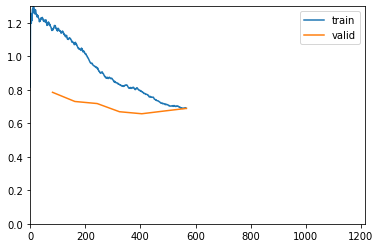

Better model found at epoch 1 with valid_loss value: 0.7307010293006897.
Better model found at epoch 2 with valid_loss value: 0.7183137536048889.
Better model found at epoch 3 with valid_loss value: 0.6694180369377136.
Better model found at epoch 4 with valid_loss value: 0.6573449373245239.
No improvement since epoch 4: early stopping


In [44]:
learn.fit_flat_cos(15,lr=1e-2)

In [45]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [46]:
learn.dls = dlsTest

In [47]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.6084262728691101.


(#4) [0.6938316822052002,0.6084262728691101,0.6598173515981736,0.6337719298245614]

## Ranger + MixUp

In [48]:
opt_func = partial(ranger, beta=(0.9,0.99), eps=1e-6)

In [49]:
learn = timm_learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.228947,0.925362,0.512232,0.535928,0.521866,00:40
1,1.247674,0.860082,0.529052,0.554517,0.518950,00:40


Better model found at epoch 0 with valid_loss value: 0.9253618717193604.


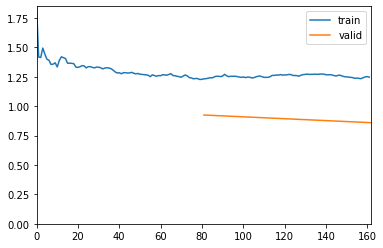

Better model found at epoch 1 with valid_loss value: 0.860081672668457.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.224088,0.857076,0.548930,0.577922,0.518950,00:50
1,1.194527,0.857072,0.535168,0.566553,0.483965,00:50
2,1.206970,0.822167,0.567278,0.595541,0.545190,00:50
3,1.146238,0.804443,0.550459,0.573574,0.556851,00:50
4,1.145342,0.786563,0.573394,0.604575,0.539359,00:50
5,1.118179,0.778499,0.562691,0.585075,0.571429,00:50
6,1.070669,0.772981,0.558104,0.578947,0.577259,00:50
7,1.095663,0.745596,0.559633,0.586207,0.545190,00:50
8,1.039564,0.757314,0.567278,0.596154,0.542274,00:50
9,1.042536,0.746831,0.577982,0.594366,0.615160,00:50


Better model found at epoch 0 with valid_loss value: 0.8570759892463684.


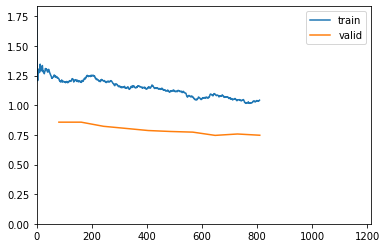

Better model found at epoch 1 with valid_loss value: 0.8570716977119446.
Better model found at epoch 2 with valid_loss value: 0.8221666216850281.
Better model found at epoch 3 with valid_loss value: 0.8044425249099731.
Better model found at epoch 4 with valid_loss value: 0.7865630388259888.
Better model found at epoch 5 with valid_loss value: 0.7784985899925232.
Better model found at epoch 6 with valid_loss value: 0.7729812264442444.
Better model found at epoch 7 with valid_loss value: 0.7455956935882568.
No improvement since epoch 7: early stopping


In [50]:
learn.fine_tune(15,freeze_epochs=2)

In [51]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [52]:
learn.dls = dlsTest

In [53]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5551425218582153.


(#4) [34.376808166503906,0.5551425218582153,0.6246786632390745,0.5328947368421053]

## Faltten + MixUp

In [54]:
learn = timm_learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.304443,0.927731,0.550459,0.574468,0.551020,00:40
1,0.989146,0.738155,0.582569,0.610063,0.565598,00:40


Better model found at epoch 0 with valid_loss value: 0.9277305603027344.


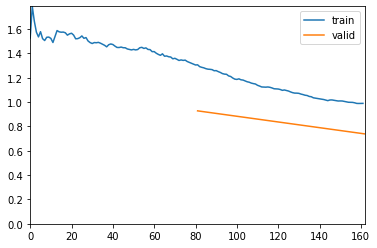

Better model found at epoch 1 with valid_loss value: 0.738154947757721.


In [55]:
learn.fit_flat_cos(2,lr=1e-3)

In [56]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.964073,0.707734,0.509174,0.520147,0.827988,00:50
1,0.957482,0.770254,0.480122,0.542857,0.055394,00:50
2,0.929352,2.009555,0.501529,0.519722,0.653061,00:50
3,0.958941,1.350431,0.484709,0.507463,0.594752,00:50


Better model found at epoch 0 with valid_loss value: 0.7077339887619019.


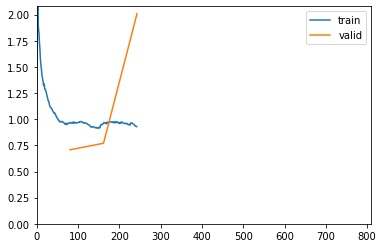

No improvement since epoch 0: early stopping


In [57]:
learn.fit_flat_cos(10,lr=1e-2)

In [58]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [59]:
learn.dls = dlsTest

In [60]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5625774264335632.


(#4) [0.7110438346862793,0.5625774264335632,0.5745296671490593,0.8706140350877193]

## Ranger + Label

In [61]:
opt_func = partial(ranger, beta=(0.9,0.99), eps=1e-6)

In [62]:
learn = timm_learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func,loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.309073,1.004323,0.501529,0.541463,0.323615,00:40
1,1.298710,0.916011,0.524465,0.566667,0.396501,00:40


Better model found at epoch 0 with valid_loss value: 1.00432288646698.


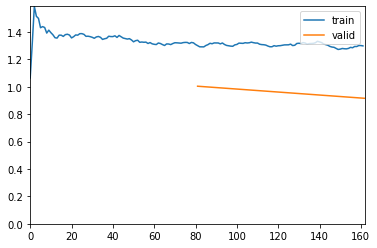

Better model found at epoch 1 with valid_loss value: 0.9160113334655762.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.234130,0.906412,0.509174,0.541985,0.413994,00:50
1,1.249987,0.893991,0.530581,0.567164,0.443149,00:50
2,1.205779,0.872503,0.524465,0.560606,0.431487,00:50
3,1.213272,0.860071,0.529052,0.561404,0.466472,00:50
4,1.211272,0.838598,0.539755,0.580769,0.440233,00:50
5,1.172517,0.816016,0.535168,0.570909,0.457726,00:50
6,1.154444,0.803596,0.538226,0.572438,0.472303,00:50
7,1.125374,0.792907,0.539755,0.571918,0.486880,00:51
8,1.080492,0.782667,0.541284,0.570033,0.510204,00:50
9,1.091159,0.777627,0.538226,0.568562,0.495627,00:50


Better model found at epoch 0 with valid_loss value: 0.9064118266105652.


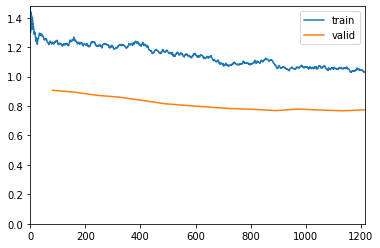

Better model found at epoch 1 with valid_loss value: 0.8939908146858215.
Better model found at epoch 2 with valid_loss value: 0.8725026249885559.
Better model found at epoch 3 with valid_loss value: 0.8600710034370422.
Better model found at epoch 4 with valid_loss value: 0.8385976552963257.
Better model found at epoch 5 with valid_loss value: 0.8160158395767212.
Better model found at epoch 6 with valid_loss value: 0.8035959601402283.
Better model found at epoch 7 with valid_loss value: 0.7929069399833679.
Better model found at epoch 8 with valid_loss value: 0.7826674580574036.
Better model found at epoch 9 with valid_loss value: 0.7776272892951965.
Better model found at epoch 10 with valid_loss value: 0.7687221765518188.
Better model found at epoch 13 with valid_loss value: 0.7675647735595703.


In [63]:
learn.fine_tune(15,freeze_epochs=2)

In [64]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [65]:
learn.dls = dlsTest

In [66]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5737298727035522.


(#4) [2.056037425994873,0.5737298727035522,0.6379310344827587,0.5679824561403509]

## Faltten + Label

In [67]:
learn = timm_learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.349044,0.968752,0.530581,0.548128,0.597668,00:40
1,1.031650,0.830822,0.539755,0.554688,0.620991,00:40


Better model found at epoch 0 with valid_loss value: 0.9687519669532776.


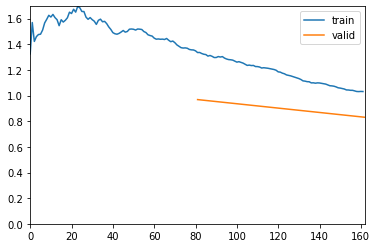

Better model found at epoch 1 with valid_loss value: 0.8308219313621521.


In [68]:
learn.fit_flat_cos(2,lr=1e-3)

In [69]:
learn.unfreeze()

SuggestedLRs(lr_min=0.00014454397605732084, lr_steep=8.31763736641733e-06)

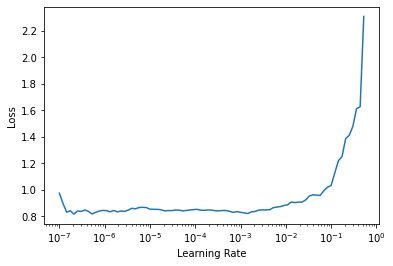

In [70]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.952704,0.794608,0.503058,0.517510,0.775510,00:50
1,0.954241,0.794796,0.535168,0.531100,0.970845,00:50
2,0.974330,15.871819,0.539755,0.541016,0.807580,00:50
3,1.028092,1.476711,0.495413,0.515222,0.641399,00:50


Better model found at epoch 0 with valid_loss value: 0.7946079969406128.


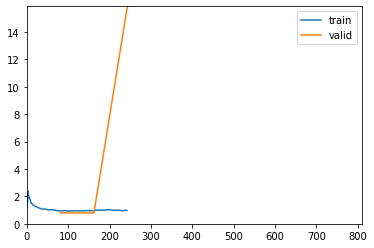

No improvement since epoch 0: early stopping


In [71]:
learn.fit_flat_cos(10,lr=1e-2)

In [72]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [73]:
learn.dls = dlsTest

In [74]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5142503380775452.


(#4) [0.7912909388542175,0.5142503380775452,0.5504731861198738,0.7653508771929824]

## Label + MixUp

In [75]:
learn = timm_learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.290115,1.173168,0.558104,0.608871,0.440233,00:40
1,1.128135,0.797288,0.533639,0.558642,0.527697,00:40


Better model found at epoch 0 with valid_loss value: 1.1731677055358887.


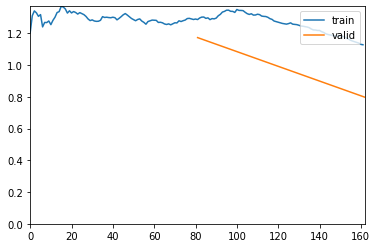

Better model found at epoch 1 with valid_loss value: 0.7972877025604248.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.811996,0.700726,0.600917,0.642361,0.539359,00:50
1,0.764919,0.688339,0.600917,0.629747,0.580175,00:50
2,0.735586,0.676426,0.584098,0.602899,0.606414,00:50
3,0.715166,0.663921,0.605505,0.629969,0.600583,00:50
4,0.697717,0.672027,0.611621,0.613232,0.702624,00:50
5,0.686092,0.662461,0.631498,0.656442,0.623907,00:50
6,0.686456,0.663620,0.613150,0.646104,0.580175,00:51
7,0.681206,0.655352,0.619266,0.665493,0.551020,00:50
8,0.677073,0.645025,0.648318,0.682848,0.615160,00:50
9,0.670076,0.644445,0.636086,0.662539,0.623907,00:50


Better model found at epoch 0 with valid_loss value: 0.7007264494895935.


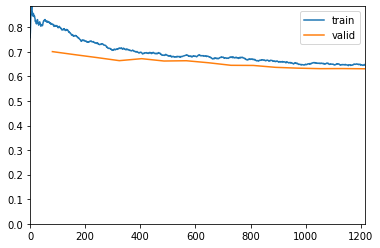

Better model found at epoch 1 with valid_loss value: 0.6883394122123718.
Better model found at epoch 2 with valid_loss value: 0.6764257550239563.
Better model found at epoch 3 with valid_loss value: 0.6639209985733032.
Better model found at epoch 5 with valid_loss value: 0.66246098279953.
Better model found at epoch 7 with valid_loss value: 0.6553522944450378.
Better model found at epoch 8 with valid_loss value: 0.6450251340866089.
Better model found at epoch 9 with valid_loss value: 0.6444454193115234.
Better model found at epoch 10 with valid_loss value: 0.636725127696991.
Better model found at epoch 11 with valid_loss value: 0.633380115032196.
Better model found at epoch 12 with valid_loss value: 0.6313570141792297.
Better model found at epoch 14 with valid_loss value: 0.6308757662773132.


In [76]:
learn.fine_tune(15,freeze_epochs=2)

In [77]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [78]:
learn.dls = dlsTest

In [79]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.6728624701499939.


(#4) [1.1350942850112915,0.6728624701499939,0.7622950819672131,0.6118421052631579]